## Income_Category (categoria de renda) x Attrition_Flag (sinalizador de atrito)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('BankChurners.csv')

In [13]:
# Dropando a coluna CLIENTNUM e também as 2 últimas colunas
df = df.drop(['CLIENTNUM',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
             axis=1)

In [14]:
# Renomeando e dropando valores nulos da coluna Income_Category
df.replace({'Income_Category':{'Unknown': np.nan}}, inplace = True)
df.dropna(inplace=True)

In [15]:
# Checando os valores da coluna Attrition_Flag
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [16]:
# Criando dummies a partir da coluna Attrition_Flag
df = pd.get_dummies(df, columns=['Attrition_Flag'], prefix='Att')

In [17]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Att_Attrited Customer,Att_Existing Customer
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [18]:
def ajusta_faixa_renda(i):
    if i == '$120K +':
        return '1. Acima de 120K +'
    elif i == '$40K - $60K':
        return '4. Entre 40 e 60K'
    elif i == '$60K - $80K':
        return '3. Entre 60 e 80K'
    elif i == '$80K - $120K':
        return '2. Entre 80 e 120K'
    else:
        return '5. Abaixo de 40K'

df['Income_Category'] = df.Income_Category.apply(ajusta_faixa_renda)

In [19]:
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Att_Attrited Customer,Att_Existing Customer
0,45,M,3,High School,Married,3. Entre 60 e 80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,F,5,Graduate,Single,5. Abaixo de 40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,M,3,Graduate,Married,2. Entre 80 e 120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,F,4,High School,Unknown,5. Abaixo de 40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,M,3,Uneducated,Married,3. Entre 60 e 80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,4. Entre 40 e 60K,Blue,40,3,2,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,1
10123,41,M,2,Unknown,Divorced,4. Entre 40 e 60K,Blue,25,4,2,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,0
10124,44,F,1,High School,Married,5. Abaixo de 40K,Blue,36,5,3,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0
10125,30,M,2,Graduate,Unknown,4. Entre 40 e 60K,Blue,36,4,3,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,0


### Relação Income / Churn

In [20]:
df_churn = df.groupby(['Income_Category'])[['Att_Attrited Customer', 'Att_Existing Customer']].sum()/df.groupby(['Income_Category'])[['Att_Attrited Customer', 'Att_Existing Customer']].count()
df_churn.rename({'Att_Attrited Customer':'Attrited Customer'}, axis=1, inplace = True)
df_churn.rename({'Att_Existing Customer':'Existing Customer'}, axis=1, inplace = True)
df_churn

,Attrited Customer,Existing Customer
Income_Category,,
1. Acima de 120K +,0.173315,0.826685
2. Entre 80 e 120K,0.157655,0.842345
3. Entre 60 e 80K,0.134807,0.865193
4. Entre 40 e 60K,0.151397,0.848603
5. Abaixo de 40K,0.171862,0.828138


In [74]:
df_Attrited_sum = df.groupby(['Income_Category'], as_index=False)['Att_Attrited Customer'].sum()
df_Attrited_count = df.groupby(['Income_Category'], as_index=False)['Att_Attrited Customer'].count()
df_Attrited = (df_Attrited_sum['Att_Attrited Customer'] / df_Attrited_count['Att_Attrited Customer'])*100

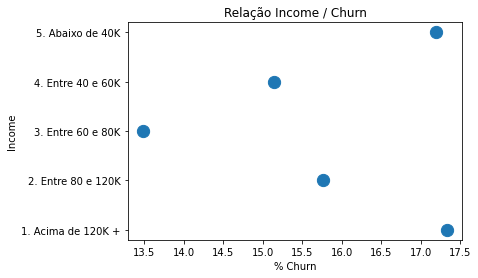

In [75]:
plt.scatter(df_Attrited, df_Attrited_sum['Income_Category'], s=150)
plt.title('Relação Income / Churn')
plt.ylabel('Income')
plt.xlabel('% Churn')
plt.show()

#### Resumo: Todas as categorias de renda tiveram porcentagens de saída bastante próximas (entre 13,5 e 17,5%), portando não podemos apontar esse indicador como possível causa do problema.